# APPENDIX

In [1]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import image

import os

from skimage.transform import resize

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelBinarizer, LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Embedding, LSTM, SimpleRNN, Input
from keras.applications import imagenet_utils, ResNet50
from keras.applications.imagenet_utils import preprocess_input
from keras.datasets import mnist, cifar10
from keras.utils import to_categorical
from keras.datasets import imdb

from scipy.sparse import csr_matrix

In [2]:
import h5py
f = h5py.File('spectrograms.h5', 'r')
keys = list(f.keys())
keys

['amecro',
 'barswa',
 'bkcchi',
 'blujay',
 'daejun',
 'houfin',
 'mallar3',
 'norfli',
 'rewbla',
 'stejay',
 'wesmea',
 'whcspa']

In [3]:
for species_key in keys:
    spectrograms = f[species_key]
    print(f'Shape of {species_key}', spectrograms.shape)

Shape of amecro (256, 343, 52)
Shape of barswa (256, 343, 55)
Shape of bkcchi (256, 343, 57)
Shape of blujay (256, 343, 50)
Shape of daejun (256, 343, 58)
Shape of houfin (256, 343, 44)
Shape of mallar3 (256, 343, 36)
Shape of norfli (256, 343, 59)
Shape of rewbla (256, 343, 41)
Shape of stejay (256, 343, 40)
Shape of wesmea (256, 343, 36)
Shape of whcspa (256, 343, 51)


## BINARY CLASSIFICATION

In [142]:
spectrogram_species= []
labels = []

# Loop through each bird species in the HDF5 file
for species_key in ['amecro', 'blujay']:
    spectrograms = f[species_key][:].transpose((2, 1, 0))
    for spectrogram in spectrograms:
      
        spectrogram_species.append(spectrogram)
        labels.append(species_key)
spectrogram_species = np.array(spectrogram_species)

encoder = LabelEncoder()
labels = encoder.fit_transform(labels)

In [144]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(spectrogram_species, labels, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(71, 343, 256) (31, 343, 256) (71,) (31,)


In [145]:
binary_model = Sequential([
    Input(shape=(343,256,1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [146]:
# Compile the model
binary_model.compile(optimizer='rmsprop', loss='binary_crossentropy',  metrics=['accuracy'])

# Train the model
history = binary_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
3/3 [==============================] - 2s 632ms/step - loss: 0.6374 - accuracy: 0.6620 - val_loss: 1.4291 - val_accuracy: 0.5806
Epoch 2/10
3/3 [==============================] - 2s 560ms/step - loss: 0.9583 - accuracy: 0.6338 - val_loss: 0.3607 - val_accuracy: 0.8387
Epoch 3/10
3/3 [==============================] - 2s 571ms/step - loss: 0.3560 - accuracy: 0.8451 - val_loss: 0.5323 - val_accuracy: 0.7097
Epoch 4/10
3/3 [==============================] - 2s 564ms/step - loss: 0.2738 - accuracy: 0.8873 - val_loss: 0.2267 - val_accuracy: 0.8387
Epoch 5/10
3/3 [==============================] - 2s 555ms/step - loss: 0.2096 - accuracy: 0.9014 - val_loss: 0.2061 - val_accuracy: 0.8387
Epoch 6/10
3/3 [==============================] - 2s 562ms/step - loss: 0.1944 - accuracy: 0.8873 - val_loss: 0.1965 - val_accuracy: 0.8710
Epoch 7/10
3/3 [==============================] - 2s 563ms/step - loss: 0.1750 - accuracy: 0.9014 - val_loss: 0.1842 - val_accuracy: 0.8710
Epoch 8/10
3/3 [====

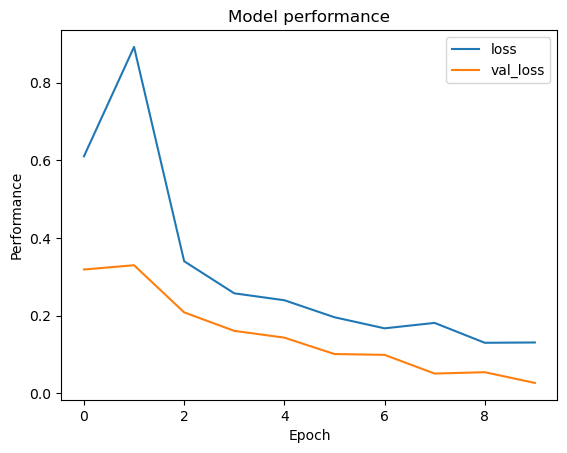

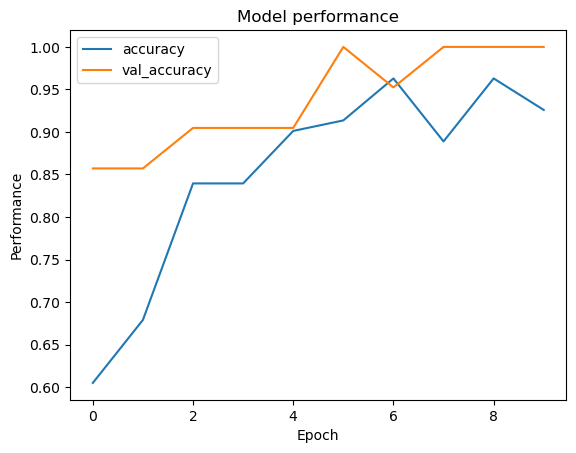

In [9]:
# Plot the accuracy and loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model performance')
plt.xlabel('Epoch')
plt.ylabel('Performance')
plt.legend()
plt.show()



plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model performance')
plt.xlabel('Epoch')
plt.ylabel('Performance')
plt.legend()
plt.show()

In [10]:
train_val = binary_model.evaluate(X_train, y_train, verbose=0)
print("Train loss: {:.2f}%".format(train_val[0]*100))

test_val = binary_model.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.2f}%".format(test_val[0]*100))

Train loss: 10.55%
Test loss: 2.63%


In [11]:
train_score = binary_model.evaluate(X_train, y_train, verbose=0)
print("Train Accuracy: {:.2f}%".format(train_score[1]*100))

test_score = binary_model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(test_score[1]*100))

Train Accuracy: 95.06%
Test Accuracy: 100.00%


In [12]:
binary_model_2 = Sequential([
    Input(shape=(343,256,1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [13]:
# Compile the model
binary_model_2.compile(optimizer='rmsprop', loss='binary_crossentropy',  metrics=['accuracy'])

# Train the model
history = binary_model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
3/3 [==============================] - 2s 626ms/step - loss: 0.6426 - accuracy: 0.6543 - val_loss: 0.8767 - val_accuracy: 0.5714
Epoch 2/20
3/3 [==============================] - 2s 604ms/step - loss: 1.4924 - accuracy: 0.4938 - val_loss: 0.4503 - val_accuracy: 0.8095
Epoch 3/20
3/3 [==============================] - 2s 589ms/step - loss: 0.4987 - accuracy: 0.8148 - val_loss: 0.3992 - val_accuracy: 0.8571
Epoch 4/20
3/3 [==============================] - 2s 579ms/step - loss: 0.4193 - accuracy: 0.8395 - val_loss: 0.1961 - val_accuracy: 0.9048
Epoch 5/20
3/3 [==============================] - 2s 577ms/step - loss: 0.2545 - accuracy: 0.8765 - val_loss: 0.1701 - val_accuracy: 0.9048
Epoch 6/20
3/3 [==============================] - 2s 583ms/step - loss: 0.2242 - accuracy: 0.8642 - val_loss: 0.1437 - val_accuracy: 0.9048
Epoch 7/20
3/3 [==============================] - 2s 588ms/step - loss: 0.1999 - accuracy: 0.9383 - val_loss: 0.1319 - val_accuracy: 0.9048
Epoch 8/20
3/3 [====

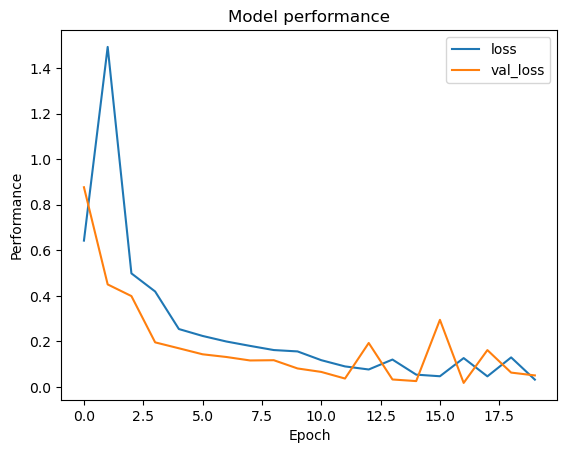

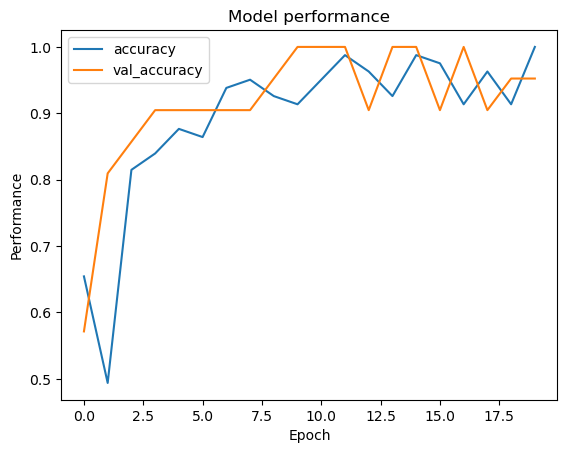

In [14]:
# Plot the accuracy and loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model performance')
plt.xlabel('Epoch')
plt.ylabel('Performance')
plt.legend()
plt.show()



plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model performance')
plt.xlabel('Epoch')
plt.ylabel('Performance')
plt.legend()
plt.show()

In [15]:
train_score = binary_model_2.evaluate(X_train, y_train, verbose=0)
print("Train Accuracy: {:.2f}%".format(train_score[1]*100))

test_score = binary_model_2.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(test_score[1]*100))

Train Accuracy: 100.00%
Test Accuracy: 95.24%


In [16]:
train_val = binary_model_2.evaluate(X_train, y_train, verbose=0)
print("Train loss: {:.2f}%".format(train_val[0]*100))

test_val = binary_model_2.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.2f}%".format(test_val[0]*100))

Train loss: 2.30%
Test loss: 5.10%


## MULTI-CLASS MODEL

In [110]:
spectrogram_species= []
labels = []

for species_key in keys:
    spectrograms = f[species_key][:].transpose((2, 1, 0))
    for spectrogram in spectrograms:
        spectrogram_species.append(spectrogram)
        labels.append(species_key)
        
spectrogram_species = np.array(spectrogram_species)

encoder = LabelEncoder()
labels = encoder.fit_transform(labels)
labels = to_categorical(labels, num_classes=12)

In [114]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(spectrogram_species, labels, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(405, 343, 256) (174, 343, 256) (405, 12) (174, 12)


In [115]:
scaler = StandardScaler()
X_train_2D = X_train.reshape(-1, X_train.shape[-1])
X_train_scaled = scaler.fit_transform(X_train_2D)
X_train = X_train_scaled.reshape(X_train.shape)


X_test_2D = X_test.reshape(-1, X_test.shape[-1])
X_test_scaled = scaler.transform(X_test_2D)
X_test = X_test_scaled.reshape(X_test.shape)


In [116]:
multi_model = Sequential([
    Input(shape=(343,256,1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)), 
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)), 
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)), 
    Flatten(), 
    Dense(128, activation='relu'),
    Dense(12, activation='softmax')
])

In [117]:
# Compile the model
multi_model.compile(optimizer='rmsprop', loss='categorical_crossentropy',  metrics=['accuracy'])

# Train the model
history = multi_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
13/13 [==============================] - 10s 718ms/step - loss: 5.5968 - accuracy: 0.2840 - val_loss: 1.7226 - val_accuracy: 0.4253
Epoch 2/10
13/13 [==============================] - 9s 693ms/step - loss: 1.0841 - accuracy: 0.6815 - val_loss: 1.3121 - val_accuracy: 0.5575
Epoch 3/10
13/13 [==============================] - 9s 695ms/step - loss: 0.5672 - accuracy: 0.8123 - val_loss: 1.6125 - val_accuracy: 0.5632
Epoch 4/10
13/13 [==============================] - 9s 700ms/step - loss: 0.3266 - accuracy: 0.8988 - val_loss: 1.5936 - val_accuracy: 0.6149
Epoch 5/10
13/13 [==============================] - 9s 697ms/step - loss: 0.4292 - accuracy: 0.9012 - val_loss: 1.4613 - val_accuracy: 0.6379
Epoch 6/10
13/13 [==============================] - 9s 697ms/step - loss: 0.1850 - accuracy: 0.9457 - val_loss: 1.6976 - val_accuracy: 0.6782
Epoch 7/10
13/13 [==============================] - 9s 706ms/step - loss: 0.1463 - accuracy: 0.9556 - val_loss: 2.5967 - val_accuracy: 0.6724
Epoch

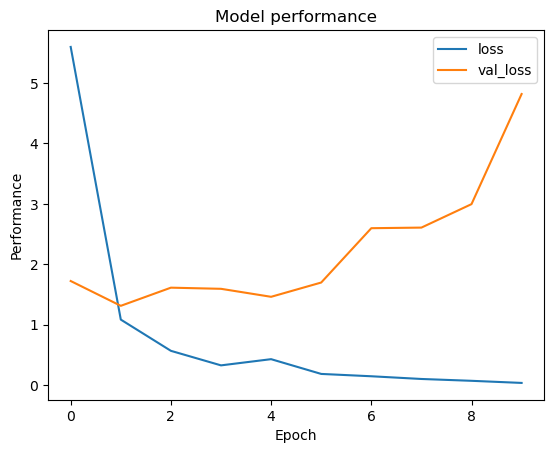

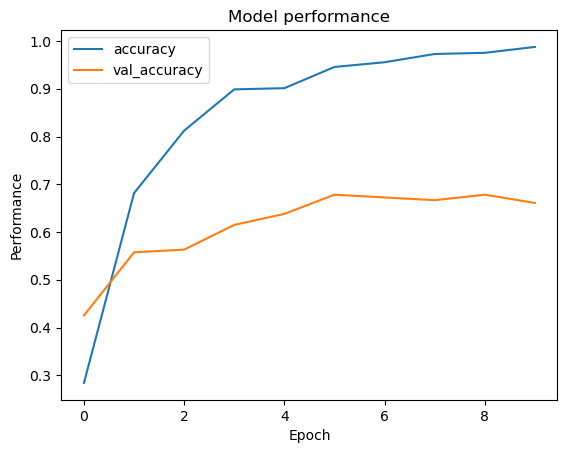

In [118]:
# Plot the accuracy and loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model performance')
plt.xlabel('Epoch')
plt.ylabel('Performance')
plt.legend()
plt.show()

# Plot the accuracy and loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model performance')
plt.xlabel('Epoch')
plt.ylabel('Performance')
plt.legend()
plt.show()

In [119]:
train_score = multi_model.evaluate(X_train, y_train, verbose=0)
print("Train Accuracy: {:.2f}%".format(train_score[1]*100))

test_score = multi_model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(test_score[1]*100))

Train Accuracy: 99.01%
Test Accuracy: 66.09%


In [120]:
multi_model_2 = Sequential([
    Input(shape=(343,256,1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)), 
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)), 
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)), 
    Flatten(),
    Dropout(0.5),  
    Dense(128, activation='relu'),
    Dense(12, activation='softmax')
])

In [121]:
# Compile the model
multi_model_2.compile(optimizer='rmsprop', loss='categorical_crossentropy',  metrics=['accuracy'])

# Train the model
history = multi_model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)


Epoch 1/20
13/13 [==============================] - 10s 743ms/step - loss: 3.7463 - accuracy: 0.2716 - val_loss: 1.4868 - val_accuracy: 0.5747
Epoch 2/20
13/13 [==============================] - 11s 855ms/step - loss: 0.8983 - accuracy: 0.7111 - val_loss: 1.4138 - val_accuracy: 0.6207
Epoch 3/20
13/13 [==============================] - 11s 865ms/step - loss: 0.4152 - accuracy: 0.8642 - val_loss: 1.3169 - val_accuracy: 0.6897
Epoch 4/20
13/13 [==============================] - 11s 869ms/step - loss: 0.6925 - accuracy: 0.8370 - val_loss: 1.2005 - val_accuracy: 0.6724
Epoch 5/20
13/13 [==============================] - 11s 862ms/step - loss: 0.2084 - accuracy: 0.9358 - val_loss: 1.3691 - val_accuracy: 0.7069
Epoch 6/20
13/13 [==============================] - 11s 855ms/step - loss: 0.3184 - accuracy: 0.9457 - val_loss: 1.3687 - val_accuracy: 0.6724
Epoch 7/20
13/13 [==============================] - 11s 863ms/step - loss: 0.1188 - accuracy: 0.9704 - val_loss: 1.5842 - val_accuracy: 0.6782

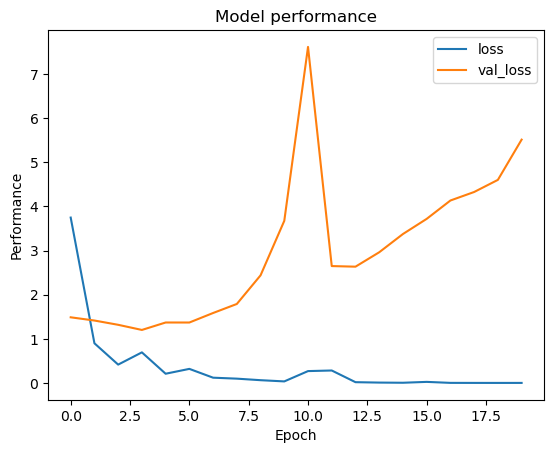

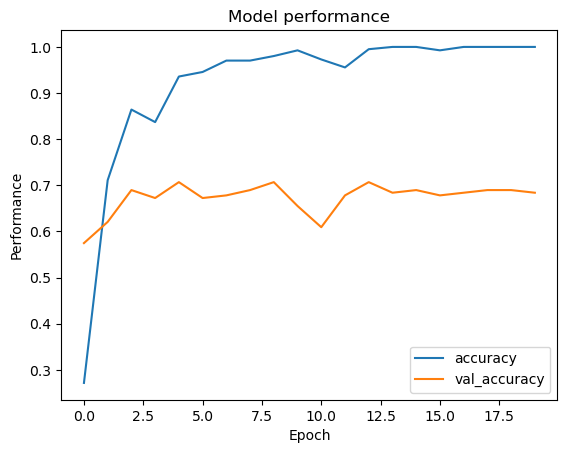

In [122]:
# Plot the accuracy and loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model performance')
plt.xlabel('Epoch')
plt.ylabel('Performance')
plt.legend()
plt.show()

# Plot the accuracy and loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model performance')
plt.xlabel('Epoch')
plt.ylabel('Performance')
plt.legend()
plt.show()

In [123]:
train_score = multi_model_2.evaluate(X_train, y_train, verbose=0)
print("Train Accuracy: {:.2f}%".format(train_score[1]*100))

test_score = multi_model_2.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(test_score[1]*100))

Train Accuracy: 100.00%
Test Accuracy: 68.39%


## EXTERNAL TEST DATA

In [124]:
import librosa
import librosa.display
from IPython.display import Audio

In [125]:
audio_recording="test_birds/test_birds/test1.mp3"
data,rate=librosa.load(audio_recording)
print(type(data),type(rate))

<class 'numpy.ndarray'> <class 'int'>


In [126]:
print(f"Sample Rate: {rate} Hz ")
print(f"Number of Samples : {data.shape[0]}")
length = data.shape[0] / rate
print("Length of the audio file is {:.2f} seconds".format(length))     

Sample Rate: 22050 Hz 
Number of Samples : 513216
Length of the audio file is 23.28 seconds


In [127]:
audio_recording="test_birds/test_birds/test2.mp3"
data,rate=librosa.load(audio_recording)
print(type(data),type(rate))
     

print(f"Sample Rate: {rate} Hz ")
print(f"Number of Samples : {data.shape[0]}")
length = data.shape[0] / rate
print("Length of the audio file is {:.2f} seconds".format(length))
     
     

<class 'numpy.ndarray'> <class 'int'>
Sample Rate: 22050 Hz 
Number of Samples : 115776
Length of the audio file is 5.25 seconds


In [128]:
audio_recording="test_birds/test_birds/test3.mp3"
data,rate=librosa.load(audio_recording)
print(type(data),type(rate))
     

print(f"Sample Rate: {rate} Hz ")
print(f"Number of Samples : {data.shape[0]}")
length = data.shape[0] / rate
print("Length of the audio file is {:.2f} seconds".format(length))

<class 'numpy.ndarray'> <class 'int'>
Sample Rate: 22050 Hz 
Number of Samples : 350208
Length of the audio file is 15.88 seconds


In [129]:
#PREPROCESSING EXTERNAL TEST CLIPS

# Path to the folder containing test clips
test_clips_folder = 'test_birds/test_birds'

# Get paths to all files in the folder
sound_clip_paths = [os.path.join(test_clips_folder, file) for file in os.listdir(test_clips_folder) if file.endswith('.mp3')]

# Initialize a list to store spectrograms
spectrograms = []

for path in sound_clip_paths:
    # Load the audio file
    audio, sr = librosa.load(path, sr=22050)
    
    # Identify "loud" parts greater than 0.5 seconds
    loud_parts = librosa.effects.split(audio, top_db=20)
    
    # Extract 2-second windows containing bird calls
    for interval in loud_parts:
        start, end = interval
        duration = end - start
        if duration >= 0.5:
            for i in range(start, end - 2 * sr + 1, sr):
                window = audio[i:i + 2 * sr]
                
                # Compute spectrogram
                spectrogram = librosa.feature.melspectrogram(y=window, sr=sr, n_fft=2048, hop_length=512, fmax=8000)
                spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
                spectrogram = resize(spectrogram, (343,256))
                spectrograms.append(spectrogram)

# Convert spectrograms list to numpy array
spectrograms = np.array(spectrograms)

In [141]:
predictions = multi_model.predict(spectrograms)

species_mapping = {0: 'amecro', 1: 'barswa', 2: 'bkcchi', 3: 'blujay', 4: 'daejun', 5: 'houfin', 6: 'mallar3', 
                   7: 'norfli', 8: 'rewbla', 9: 'stejay', 10: 'wesmea', 11: 'whcspa'}

for i, (pred, path) in enumerate(zip(predictions, sound_clip_paths)):
    print(f"Predictions for {path}:")
    
    predicted_species = np.argmax(pred)
    predicted_species_name = species_mapping[predicted_species]
    predicted_probability = pred[predicted_species] * 100
    
    for species_idx, probability in enumerate(pred):
        species_name = species_mapping[species_idx]
        if species_idx == predicted_species:
            print(f"Species: {species_name}, Probability: {probability * 100:.2f}%")
        else:
            print(f"Species: {species_name}, Probability: {probability * 100:.2f}%")
  

2/2 [==============================] - 0s 40ms/step
Predictions for test_birds/test_birds\test1.mp3:
Species: amecro, Probability: 52.60%
Species: barswa, Probability: 0.00%
Species: bkcchi, Probability: 0.00%
Species: blujay, Probability: 0.00%
Species: daejun, Probability: 0.00%
Species: houfin, Probability: 0.00%
Species: mallar3, Probability: 0.00%
Species: norfli, Probability: 45.98%
Species: rewbla, Probability: 0.00%
Species: stejay, Probability: 0.00%
Species: wesmea, Probability: 1.42%
Species: whcspa, Probability: 0.00%

Predictions for test_birds/test_birds\test2.mp3:
Species: amecro, Probability: 51.60%
Species: barswa, Probability: 0.00%
Species: bkcchi, Probability: 0.00%
Species: blujay, Probability: 0.00%
Species: daejun, Probability: 0.00%
Species: houfin, Probability: 0.00%
Species: mallar3, Probability: 0.00%
Species: norfli, Probability: 47.85%
Species: rewbla, Probability: 0.00%
Species: stejay, Probability: 0.00%
Species: wesmea, Probability: 0.55%
Species: whcspa